In [1]:
from fastai.vision.all import *

In [3]:
data_path = Path('data/')

In [14]:
data_path.ls()

(#5) [Path('data/dicom-images-test'),Path('data/dicom-images-train'),Path('data/pneumothorax'),Path('data/train-rle.csv'),Path('data/train')]

In [15]:
size=224
bs=64

In [16]:
db = DataBlock(blocks=(ImageBlock(),MaskBlock()),
               item_tfms=[Resize(size)],
               get_items=get_image_files,get_y=lambda o:str(o).replace('images','mask'))

In [17]:
dls = db.dataloaders(source=data_path/'train'/'images',bs=bs)

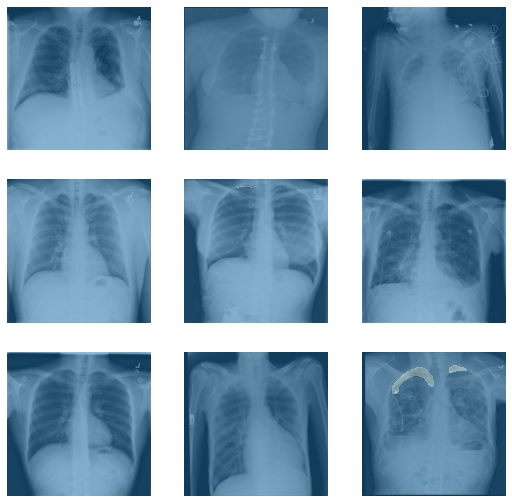

In [13]:
dls.show_batch(max_n=9)

In [19]:
learn = unet_learner(dls, resnet34, n_out=2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,time


RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR